In [1]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from matplotlib import pyplot

In [3]:
extra_data=pd.read_csv('new_data-v-1-5-10-2019.csv')
# loading extra genereated data genereated by LSTM #prediction_of_1_0007.csv
#seq2seq=pd.read_csv('encoder_decoder_generated_data.csv')
diabetes=pd.read_csv('../data/diabetes.csv')

In [5]:
extra_data=np.array(extra_data)
extra_data=extra_data[:,1:]


minority_data=diabetes[diabetes['Outcome']==1]

majority_data=diabetes[diabetes['Outcome']==0]

minority_data=np.array(minority_data)

majority_data=np.array(majority_data)

In [6]:
extra_data[1]

array([142.82005  ,  82.49655  ,  22.900919 , 122.14004  ,  37.47352  ,
         0.6099971,  38.85736  ,   1.0031466])

In [34]:
tsne=TSNE(verbose=2,perplexity=25,n_iter=5000)# perplexity =50 ,25 works better


In [35]:
tsne_results_extra=tsne.fit_transform(extra_data)
tsne_results_minority=tsne.fit_transform(minority_data)
tsne_results_majority=tsne.fit_transform(majority_data)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 106 samples in 0.000s...
[t-SNE] Computed neighbors for 106 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 106 / 106
[t-SNE] Mean sigma: 15.409245
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 53.2935295, gradient norm = 0.5247826 (50 iterations in 0.036s)
[t-SNE] Iteration 100: error = 54.7745934, gradient norm = 0.4608876 (50 iterations in 0.026s)
[t-SNE] Iteration 150: error = 53.7758179, gradient norm = 0.5304527 (50 iterations in 0.024s)
[t-SNE] Iteration 200: error = 53.6422424, gradient norm = 0.5181947 (50 iterations in 0.026s)
[t-SNE] Iteration 250: error = 53.9584541, gradient norm = 0.5227884 (50 iterations in 0.027s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.958454
[t-SNE] Iteration 300: error = 0.2914811, gradient norm = 0.0085087 (50 iterations in 0.023s)
[t-SNE] Iteration 350: error = 0.2011535, gradient norm = 0.0021685 

[t-SNE] Iteration 1050: error = 0.4756305, gradient norm = 0.0000640 (50 iterations in 0.143s)
[t-SNE] Iteration 1100: error = 0.4750428, gradient norm = 0.0001146 (50 iterations in 0.136s)
[t-SNE] Iteration 1150: error = 0.4748911, gradient norm = 0.0000990 (50 iterations in 0.146s)
[t-SNE] Iteration 1200: error = 0.4745681, gradient norm = 0.0000841 (50 iterations in 0.140s)
[t-SNE] Iteration 1250: error = 0.4740871, gradient norm = 0.0000888 (50 iterations in 0.147s)
[t-SNE] Iteration 1300: error = 0.4737537, gradient norm = 0.0001015 (50 iterations in 0.139s)
[t-SNE] Iteration 1350: error = 0.4731770, gradient norm = 0.0001052 (50 iterations in 0.148s)
[t-SNE] Iteration 1400: error = 0.4727204, gradient norm = 0.0000603 (50 iterations in 0.143s)
[t-SNE] Iteration 1450: error = 0.4722462, gradient norm = 0.0001031 (50 iterations in 0.150s)
[t-SNE] Iteration 1500: error = 0.4721981, gradient norm = 0.0000707 (50 iterations in 0.143s)
[t-SNE] Iteration 1550: error = 0.4717978, gradien

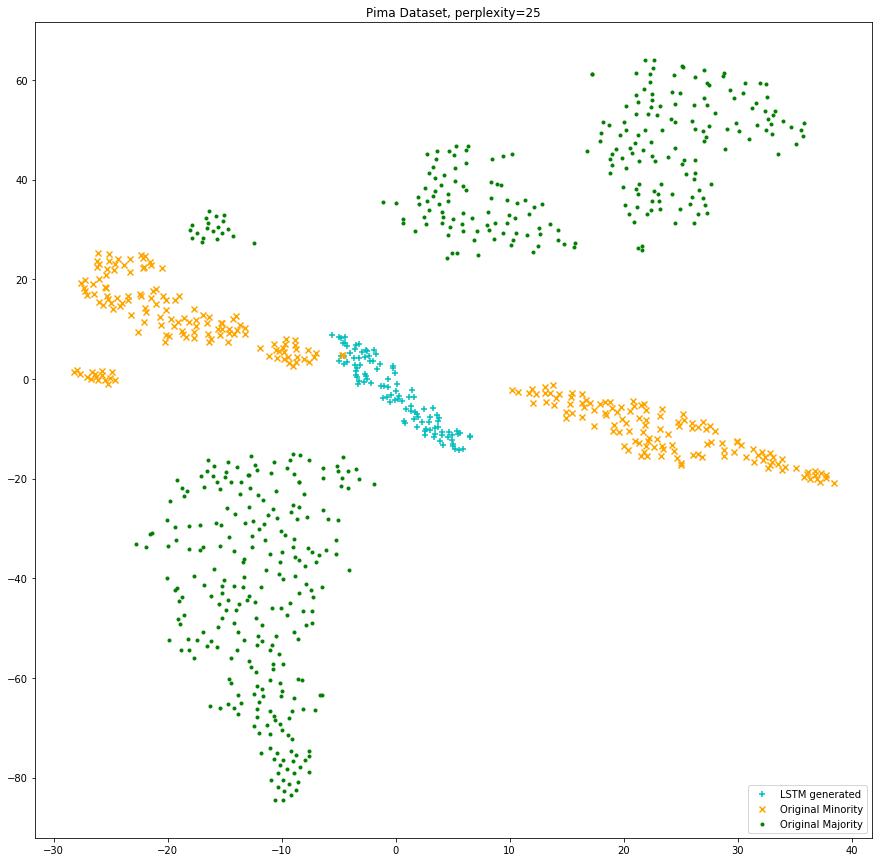

In [36]:
pyplot.figure(figsize=(15,15))
pyplot.scatter(tsne_results_extra[:,0],tsne_results_extra[:,1],label='LSTM generated',color='c',marker='+')
pyplot.scatter(tsne_results_minority[:,0],tsne_results_minority[:,1],label='Original Minority',color='orange',marker='x')
pyplot.scatter(tsne_results_majority[:,0],tsne_results_majority[:,1],label='Original Majority',color='g',marker='.')
pyplot.title('Pima Dataset, perplexity=25')

pyplot.legend(loc=4)
pyplot.savefig('tnse-pima-perplexity-25 .png',dpi=300)
pyplot.show()